Libraries imported


In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("All libraries imported successfully")

All libraries imported successfully


loads three key COVID-19 datasets from the Johns Hopkins University repository.

In [2]:
base_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/"


# Global confirmed cases
confirmed_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

# Global deaths
deaths_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"

# Global number of people who recovered
recovered_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"

# Load all three datasets 
confirmed_df = pd.read_csv(confirmed_url)
deaths_df = pd.read_csv(deaths_url)  
recovered_df = pd.read_csv(recovered_url)  

# Display the first few rows of each
print("       CONFIRMED CASES      ")
print(confirmed_df.head())
print(f"\nShape: {confirmed_df.shape}")
print(f"Columns: {confirmed_df.columns.tolist()[:5]}...")  

print("          DEATHS          ")
print(deaths_df.head())
print(f"\nShape: {deaths_df.shape}")
print(f"Columns: {deaths_df.columns.tolist()[:5]}...")  

print("          RECOVERED             ")
print(recovered_df.head())
print(f"\nShape: {recovered_df.shape}")
print(f"Columns: {recovered_df.columns.tolist()[:5]}...")  

       CONFIRMED CASES      
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   
3        0        0        0        0  ...    47866   47875   47875   47875   
4        0        0        0        0  ...   105255  105277  105277  105277   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  

This code systematically analyzes and compares the three COVID-19 datasets (confirmed cases, deaths, and recoveries). It loops through each dataset to print key information including its dimensions, memory usage, sample rows, column structure, missing values, and geographic coverage. This exploration helps understand each dataset's structure, identify data quality issues, and verify that all three datasets are properly loaded and consistent with each other before proceeding with deeper analysis.



In [3]:
# INITIAL DATA EXPLORATION
print()
print("INITIAL DATA EXPLORATION")
print()


# Dictionary of all datasets for easy looping
datasets = {
    "Confirmed Cases": confirmed_df,
    "Deaths": deaths_df,
    "Recovered": recovered_df
}

for name, df in datasets.items():
    print()
    print(f"EXPLORING: {name}")
    print()
    
    print(f"\nShape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print("\nFirst 3 rows:")
    print(df.head(3))
    
    print("\nColumns (first 10):")
    print(df.columns.tolist()[:10])
    
    print("\nMissing values (first 5 columns):")
    print(df.isnull().sum().head())
    
    print(f"\nUnique countries: {df['Country/Region'].nunique()}")


INITIAL DATA EXPLORATION


EXPLORING: Confirmed Cases


Shape: (289, 1147)
Memory usage: 2.55 MB

First 3 rows:
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  2/28/23  3/1/23  3/2/23  3/3/23  \
0        0        0        0        0  ...   209322  209340  209358  209362   
1        0        0        0        0  ...   334391  334408  334408  334427   
2        0        0        0        0  ...   271441  271448  271463  271469   

   3/4/23  3/5/23  3/6/23  3/7/23  3/8/23  3/9/23  
0  209369  209390  209406  209436  209451  209451  
1  334427  334427  334427  334427  334443  334457  
2  271469  271477  271477  271490  271494  271496  

[3 rows x 1147 columns]

Columns (first 10):
['Province/State', 

Performs systematic data cleaning on your three COVID-19 datasets by first creating copies to avoid modifying the originals, then iterating through each dataset to handle missing values by filling empty province/state entries with "National" and converting all date-column nulls to zeros, while also checking for duplicate rows. After cleaning, it updates the original DataFrames with the processed versions and provides a summary showing the before/after shapes and missing value counts for each dataset, ensuring all three are consistently formatted and ready for analysis.

In [4]:
print()
print("DATA CLEANING & PREPROCESSING")
print()

datasets = {
    "Confirmed Cases": confirmed_df.copy(),
    "Deaths": deaths_df.copy(),
    "Recovered": recovered_df.copy()
}

cleaned_datasets = {}

for name, df in datasets.items():
    print(f"\n{'='*40}")
    print(f"CLEANING: {name}")
    print('='*40)
    
    # Store original shape
    original_shape = df.shape
    
    # 1. Check missing values
    missing_before = df.isnull().sum().sum()
    print(f"Missing values before: {missing_before}")
    
    # 2. Check duplicates (should be 0 for this data structure)
    duplicates = df.duplicated().sum()
    print(f"Duplicate rows: {duplicates}")
    
    # 3. Handle Province/State missing values
    df['Province/State'] = df['Province/State'].fillna('National')
    
    # 4. Fill numeric (date) columns with 0 for missing values
    date_columns = df.columns[4:]  # Skip first 4 geo columns
    df[date_columns] = df[date_columns].fillna(0).astype(int)
    
    # 5. Verify no missing values remain
    missing_after = df.isnull().sum().sum()
    print(f"Missing values after: {missing_after}")
    
    # Store cleaned dataset
    cleaned_datasets[name] = df
    
    print(f"Cleaned {name}: {original_shape} → {df.shape}")

print()
print("DATA CLEANING SUMMARY")
print()

# Update original DataFrames
confirmed_df = cleaned_datasets["Confirmed Cases"]
deaths_df = cleaned_datasets["Deaths"]
recovered_df = cleaned_datasets["Recovered"]

print("All datasets cleaned and ready for analysis")


DATA CLEANING & PREPROCESSING


CLEANING: Confirmed Cases
Missing values before: 202
Duplicate rows: 0
Missing values after: 4
Cleaned Confirmed Cases: (289, 1147) → (289, 1147)

CLEANING: Deaths
Missing values before: 202
Duplicate rows: 0
Missing values after: 4
Cleaned Deaths: (289, 1147) → (289, 1147)

CLEANING: Recovered
Missing values before: 201
Duplicate rows: 0
Missing values after: 2
Cleaned Recovered: (274, 1147) → (274, 1147)

DATA CLEANING SUMMARY

All datasets cleaned and ready for analysis


 Takes the three separate COVID-19 spreadsheets and combines them into one big spreadsheet where every row shows the cases, deaths, and recoveries for each country on each day, making it much easier to analyze how the pandemic changed over time.

In [5]:
# create combined data set

# Function to melt wide format to long format
def melt_covid_data(df, value_name="Cases"):
    """Convert wide format (many date columns) to long format"""
    melted = df.melt(
        id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
        var_name='Date',
        value_name=value_name
    )
    melted['Date'] = pd.to_datetime(melted['Date'])
    return melted

# Create long format datasets
confirmed_long = melt_covid_data(confirmed_df, "Confirmed")

deaths_long = melt_covid_data(deaths_df, "Deaths")

recovered_long = melt_covid_data(recovered_df, "Recovered")

# Merge all three
df = confirmed_long.merge(
    deaths_long, 
    on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date']
).merge(
    recovered_long,
    on=['Province/State', 'Country/Region', 'Lat', 'Long', 'Date']
)

print(f"Combined dataset created: {df.shape}")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

# Extract temporal features early (Year and Month)
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

Combined dataset created: (306324, 8)
Date range: 2020-01-22 00:00:00 to 2023-03-09 00:00:00


 Calculates and displays the overall COVID-19 pandemic statistics by adding up all the confirmed cases, deaths, and recoveries from every country and date in the dataset, then calculates what percentage of total cases resulted in deaths (mortality rate) and what percentage led to recoveries (recovery rate), giving a high-level summary of the global impact of the pandemic.

In [6]:
#EXPLORATORY DATA ANALYSIS (EDA)
print()
print("EXPLORATORY DATA ANALYSIS")
print()

# Global statistics
print("\nGlobal COVID-19 Statistics:")
print()
total_cases = df['Confirmed'].sum()
total_deaths = df['Deaths'].sum()
total_recovered = df['Recovered'].sum()
global_mortality = (total_deaths / total_cases * 100)
global_recovery = (total_recovered / total_cases * 100)

print(f"Total Confirmed Cases: {total_cases:,}")
print(f"Total Deaths: {total_deaths:,}")
print(f"Total Recovered: {total_recovered:,}")
print(f"Global Mortality Rate: {global_mortality:.2f}%")
print(f"Global Recovery Rate: {global_recovery:.2f}%")


EXPLORATORY DATA ANALYSIS


Global COVID-19 Statistics:

Total Confirmed Cases: 314,458,609,242
Total Deaths: 4,385,973,999
Total Recovered: 23,208,807,963
Global Mortality Rate: 1.39%
Global Recovery Rate: 7.38%


Finds the 10 countries with the highest total COVID-19 cases, shows their total numbers of confirmed cases, deaths, and recoveries, and calculates what percentage of their cases resulted in deaths, displaying all this information in a ranked table.

In [7]:
# Top 10 countries by total cases
print("\nTop 10 Countries by Total Cases:")
print("-" * 40)
top_countries = df.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max'
}).sort_values('Confirmed', ascending=False).head(10)
top_countries['Mortality_Rate'] = (top_countries['Deaths'] / top_countries['Confirmed'] * 100).round(2)
print(top_countries)


Top 10 Countries by Total Cases:
----------------------------------------
                Confirmed   Deaths  Recovered  Mortality_Rate
Country/Region                                               
US              103802702  1123836    6298082            1.08
India            44690738   530779   30974748            1.19
France           38618509   161512     342647            0.42
Germany          38249060   168935    3659260            0.44
Brazil           37081209   699276   17771228            1.89
Japan            33320438    72997     852451            0.22
Korea, South     30615522    34093     180719            0.11
Italy            25603510   188322    4144608            0.74
United Kingdom   24425309   219948       8322            0.90
Russia           22075858   388478    5609682            1.76


The code analyzes COVID-19 trends in 2021 by grouping the data month by month, adding up all the new cases, deaths, and recoveries that occurred each month, and displaying these monthly totals in a table to show how the pandemic progressed throughout that year.

In [8]:
# Monthly trends
print("\nMonthly COVID-19 Trends (2021):")
print("-" * 40)
monthly_2021 = df[df['Year'] == 2021].groupby('Month').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum'
})
print(monthly_2021)


Monthly COVID-19 Trends (2021):
----------------------------------------
        Confirmed     Deaths   Recovered
Month                                   
1      2901112445   64848531  1595296547
2      3037331123   69259249  1688301957
3      3737424271   85569446  2097586387
4      4172126011   92845292  2367493303
5      5006393958  108171976  3025650320
6      5274648331  114655330  3395953381
7      5847738277  126499490  3821516159
8      6415692425  135487893   515610584
9      6758770334  139747938           0
10     7414180753  151648697           0
11     7595498664  153250586           0
12     8428165440  165266155           0


 Calculates and displays average COVID-19 statistics for each country by grouping the data by country, then computing the average number of confirmed cases, deaths, mortality rate, and recovery rate per entry, and shows the results for the first 10 countries in a formatted table.

In [9]:
df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed'] * 100).round(2)
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'] * 100).round(2)

# Country-wise statistics
print("\nCountry-wise Average Statistics:")
print("-" * 40)
country_stats = df.groupby('Country/Region').agg({
    'Confirmed': 'mean',
    'Deaths': 'mean',
    'Mortality_Rate': 'mean',
    'Recovery_Rate': 'mean'
}).round(2)
print(country_stats.head(10))


Country-wise Average Statistics:
----------------------------------------
                      Confirmed    Deaths  Mortality_Rate  Recovery_Rate
Country/Region                                                          
Afghanistan           113725.69   4743.16            3.89          29.48
Albania               162347.03   2174.44            1.85          30.30
Algeria               159878.96   4288.08            3.40          29.29
Andorra                21476.40    111.28            1.46          38.04
Angola                 52515.49   1077.72            2.83          26.82
Antarctica                 4.34      0.00            0.00           0.00
Antigua and Barbuda     3771.00     70.25            3.00          35.01
Argentina            4921682.35  79647.55            2.07          32.18
Armenia               249773.69   4991.59            1.87          34.40
Australia             383734.13    611.42            1.08          37.51


Creates a relationship table showing how six different COVID-19 statistics—total cases, deaths, recoveries, active cases, death percentage, and recovery percentage—move together or in opposite directions, helping identify patterns like whether countries with higher recovery rates tend to have lower death rates.

In [10]:
# Correlation analysis
print("\nCorrelation Matrix:")
print("-" * 40)

#  calculate Active cases and rates 
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']
df['Mortality_Rate'] = (df['Deaths'] / df['Confirmed'] * 100).round(2)
df['Recovery_Rate'] = (df['Recovered'] / df['Confirmed'] * 100).round(2)

# correlation with all columns
correlation_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 'Mortality_Rate', 'Recovery_Rate']
correlation_matrix = df[correlation_cols].corr()
print(correlation_matrix)


Correlation Matrix:
----------------------------------------
                Confirmed    Deaths  Recovered    Active  Mortality_Rate  \
Confirmed        1.000000  0.887649   0.136171  0.989605       -0.011210   
Deaths           0.887649  1.000000   0.204508  0.863544       -0.000572   
Recovered        0.136171  0.204508   1.000000 -0.007592       -0.000064   
Active           0.989605  0.863544  -0.007592  1.000000       -0.011427   
Mortality_Rate  -0.011210 -0.000572  -0.000064 -0.011427        1.000000   
Recovery_Rate   -0.128101 -0.106776   0.145618 -0.150319       -0.017057   

                Recovery_Rate  
Confirmed           -0.128101  
Deaths              -0.106776  
Recovered            0.145618  
Active              -0.150319  
Mortality_Rate      -0.017057  
Recovery_Rate        1.000000  


Creates three different sets of COVID-19 charts by first preparing the data with calculated metrics and cleaning up any problematic values, then generates a dashboard with four charts showing global pandemic trends over time and country rankings, followed by three statistical charts analyzing death rate patterns and case distributions across countries, and finally produces a color-coded relationship map showing how different pandemic metrics are connected, with all visualizations automatically saved as image files and displayed on screen.


GENERATING VISUALIZATIONS

Saved: covid19_global_trends.png


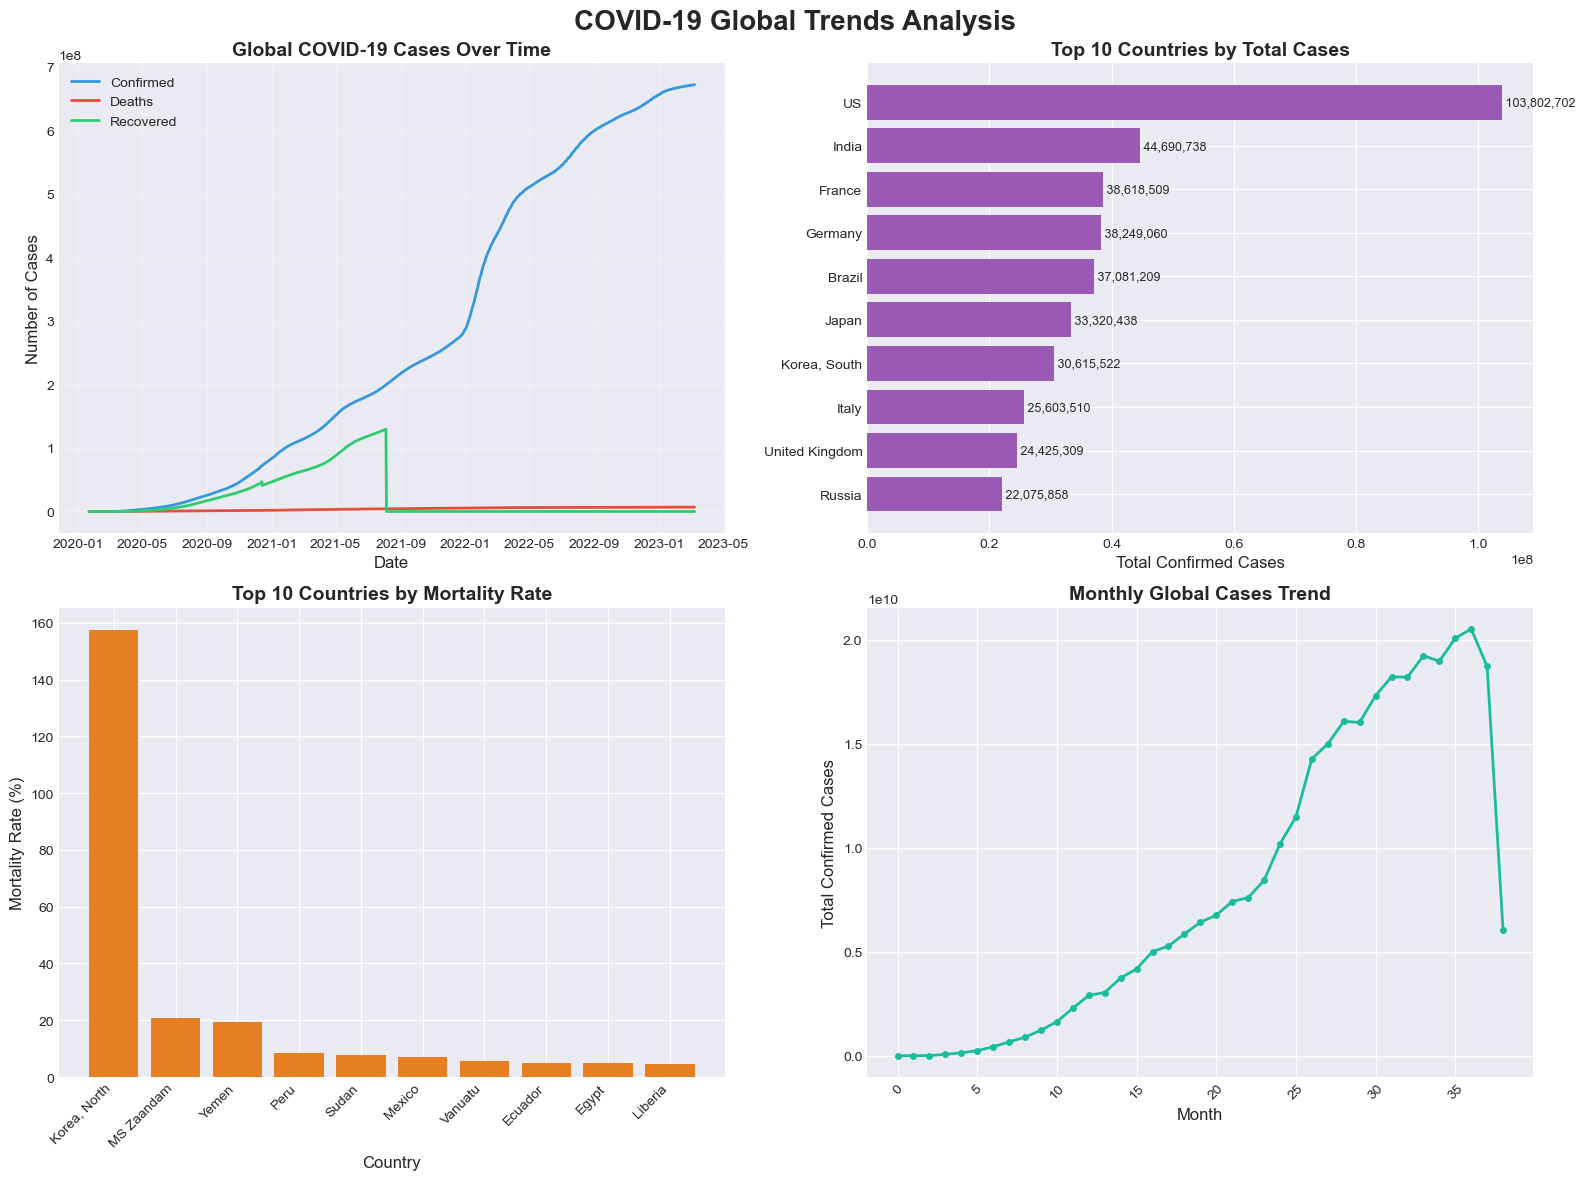

Saved: covid19_correlation_heatmap.png


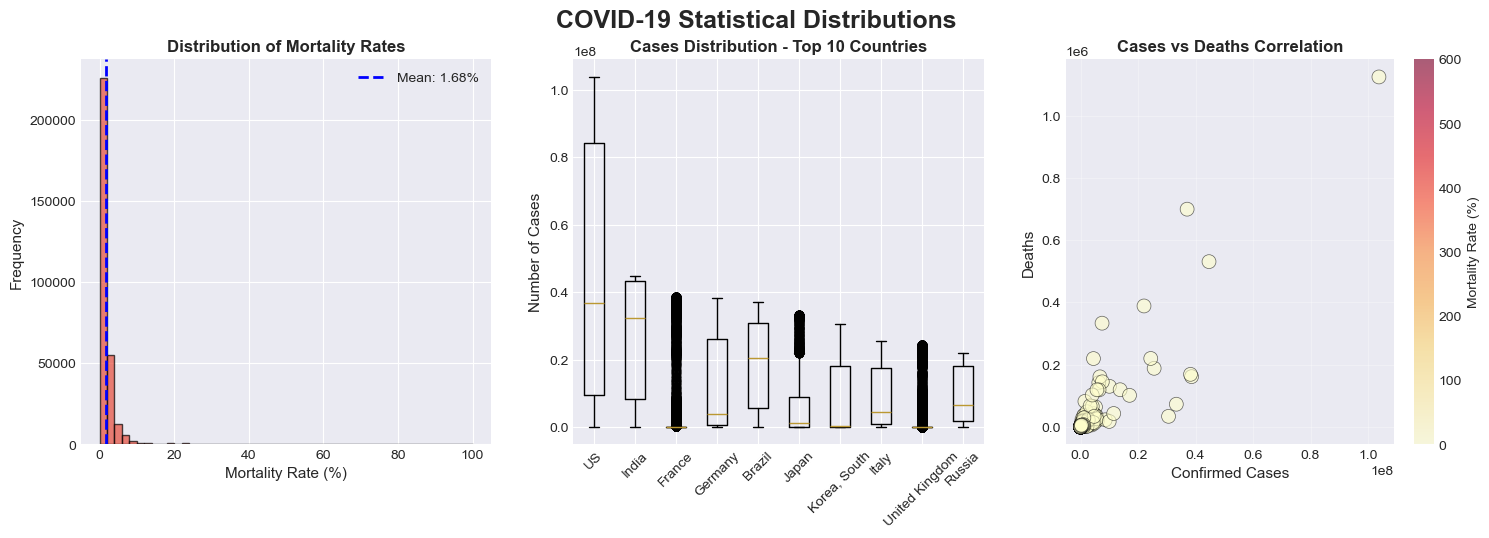

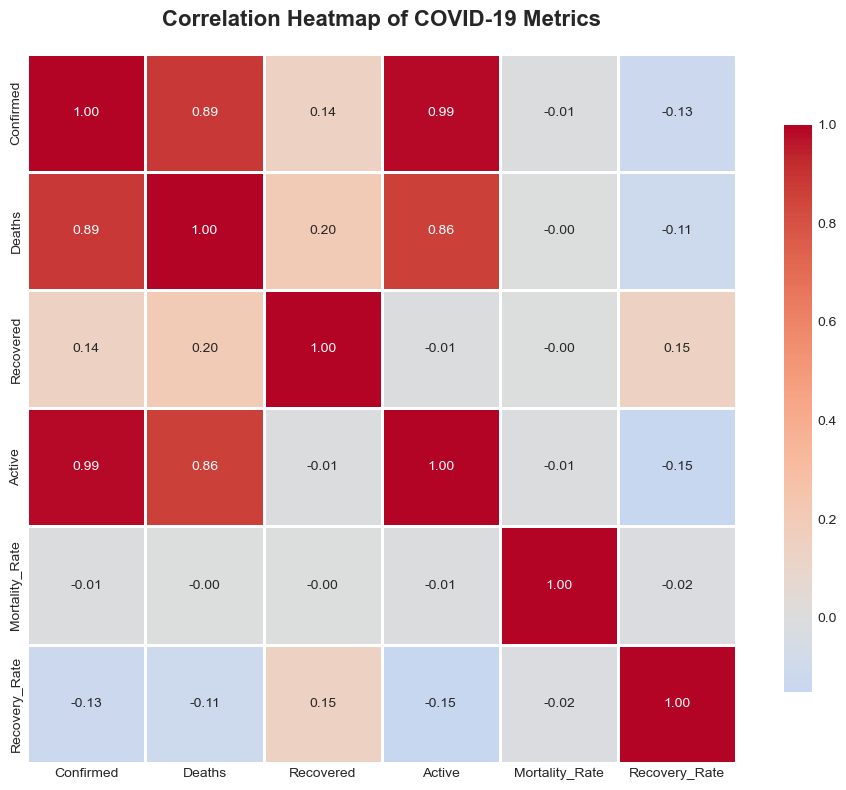

In [11]:
# DATA VISUALIZATIONS
print()
print("GENERATING VISUALIZATIONS")
print()

# Ensure required columns exist before plotting
# Create Active column if missing
if 'Active' not in df.columns:
    df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# Create Year and Month columns if missing  
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year
    df['Month'] = df['Date'].dt.month

# FIX 2: Ensure Mortality_Rate is clean and finite
if 'Mortality_Rate' not in df.columns:
    df['Mortality_Rate'] = df.apply(
        lambda row: (row['Deaths'] / row['Confirmed'] * 100).round(2) 
        if row['Confirmed'] > 0 else 0, 
        axis=1
    )

df['Mortality_Rate'] = df['Mortality_Rate'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Figure 1: Global Trends Over Time
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('COVID-19 Global Trends Analysis', fontsize=20, fontweight='bold')

# Subplot 1: Total cases over time
daily_global = df.groupby('Date').agg({
    'Confirmed': 'sum',
    'Deaths': 'sum',
    'Recovered': 'sum',
    'Active': 'sum'
})

axes[0, 0].plot(daily_global.index, daily_global['Confirmed'], 
                linewidth=2, label='Confirmed', color='#3498db')
axes[0, 0].plot(daily_global.index, daily_global['Deaths'], 
                linewidth=2, label='Deaths', color='#e74c3c')
axes[0, 0].plot(daily_global.index, daily_global['Recovered'], 
                linewidth=2, label='Recovered', color='#2ecc71')
axes[0, 0].set_title('Global COVID-19 Cases Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Date', fontsize=12)
axes[0, 0].set_ylabel('Number of Cases', fontsize=12)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Subplot 2: Top 10 countries
top10 = df.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
axes[0, 1].barh(top10.index, top10.values, color='#9b59b6')
axes[0, 1].set_title('Top 10 Countries by Total Cases', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Total Confirmed Cases', fontsize=12)
axes[0, 1].invert_yaxis()
for i, v in enumerate(top10.values):
    axes[0, 1].text(v, i, f' {v:,.0f}', va='center', fontsize=9)

# Subplot 3: Mortality rates by country
mortality_by_country = df.groupby('Country/Region')['Mortality_Rate'].mean().sort_values(ascending=False).head(10)
axes[1, 0].bar(range(len(mortality_by_country)), mortality_by_country.values, 
               color='#e67e22')
axes[1, 0].set_title('Top 10 Countries by Mortality Rate', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Country', fontsize=12)
axes[1, 0].set_ylabel('Mortality Rate (%)', fontsize=12)
axes[1, 0].set_xticks(range(len(mortality_by_country)))
axes[1, 0].set_xticklabels(mortality_by_country.index, rotation=45, ha='right')

# Subplot 4: Monthly trends 
monthly_data = df.groupby(['Year', 'Month'])['Confirmed'].sum().reset_index()
if len(monthly_data) > 0:
    monthly_data['Period'] = monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str).str.zfill(2)
    axes[1, 1].plot(range(len(monthly_data)), monthly_data['Confirmed'], 
                    marker='o', linewidth=2, color='#1abc9c', markersize=4)
    axes[1, 1].set_title('Monthly Global Cases Trend', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Month', fontsize=12)
    axes[1, 1].set_ylabel('Total Confirmed Cases', fontsize=12)
    axes[1, 1].tick_params(axis='x', rotation=45)
else:
    axes[1, 1].text(0.5, 0.5, 'No monthly data available', 
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Monthly Global Cases Trend', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('covid19_global_trends.png', dpi=300, bbox_inches='tight')
print("Saved: covid19_global_trends.png")
plt.show()

# Figure 2: Distribution Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('COVID-19 Statistical Distributions', fontsize=18, fontweight='bold')

# Histogram of mortality rates 
if len(df['Mortality_Rate']) > 0:
    mortality_rates_clean = df['Mortality_Rate'][df['Mortality_Rate'].notna() & df['Mortality_Rate'].between(0, 100)]
    if len(mortality_rates_clean) > 0:
        axes[0].hist(mortality_rates_clean, bins=50, color='#e74c3c', alpha=0.7, edgecolor='black')
        axes[0].axvline(mortality_rates_clean.mean(), color='blue', linestyle='--', 
                       linewidth=2, label=f'Mean: {mortality_rates_clean.mean():.2f}%')
    else:
        axes[0].text(0.5, 0.5, 'No valid mortality rate data', 
                    ha='center', va='center', transform=axes[0].transAxes)
else:
    axes[0].text(0.5, 0.5, 'No mortality rate data', 
                ha='center', va='center', transform=axes[0].transAxes)

axes[0].set_title('Distribution of Mortality Rates', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Mortality Rate (%)', fontsize=11)
axes[0].set_ylabel('Frequency', fontsize=11)
axes[0].legend()

# Boxplot of cases by country 
latest_data = df[df['Date'] == df['Date'].max()]
if len(latest_data) > 0:
    top_countries_list = latest_data.nlargest(10, 'Confirmed')['Country/Region'].values
    boxplot_data = []
    valid_labels = []
    for country in top_countries_list:
        country_data = df[df['Country/Region'] == country]['Confirmed'].values
        if len(country_data) > 0:
            boxplot_data.append(country_data)
            valid_labels.append(country)
    
    if boxplot_data:
        axes[1].boxplot(boxplot_data, labels=valid_labels)
    else:
        axes[1].text(0.5, 0.5, 'No case data available', 
                    ha='center', va='center', transform=axes[1].transAxes)
else:
    axes[1].text(0.5, 0.5, 'No latest data available', 
                ha='center', va='center', transform=axes[1].transAxes)

axes[1].set_title('Cases Distribution - Top 10 Countries', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Number of Cases', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)

# Scatter plot: Cases vs Deaths 
latest_by_country = df[df['Date'] == df['Date'].max()]

if len(latest_by_country) > 0:
    scatter_data = latest_by_country[latest_by_country['Confirmed'] > 0]
    if len(scatter_data) > 0:
        scatter = axes[2].scatter(scatter_data['Confirmed'], scatter_data['Deaths'], 
                                 alpha=0.6, s=100, c=scatter_data['Mortality_Rate'], 
                                 cmap='YlOrRd', edgecolors='black', linewidth=0.5)
        # Add colorbar only if scatter plot has data
        cbar = plt.colorbar(scatter, ax=axes[2])
        cbar.set_label('Mortality Rate (%)', fontsize=10)
    else:
        axes[2].text(0.5, 0.5, 'No valid case-death data', 
                    ha='center', va='center', transform=axes[2].transAxes)
else:
    axes[2].text(0.5, 0.5, 'No latest country data', 
                ha='center', va='center', transform=axes[2].transAxes)

axes[2].set_title('Cases vs Deaths Correlation', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Confirmed Cases', fontsize=11)
axes[2].set_ylabel('Deaths', fontsize=11)
axes[2].grid(True, alpha=0.3)

# Figure 3: Heatmap
if 'correlation_matrix' in globals() and correlation_matrix is not None:
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
                center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of COVID-19 Metrics', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('covid19_correlation_heatmap.png', dpi=300, bbox_inches='tight')
    print("Saved: covid19_correlation_heatmap.png")
    plt.show()
else:
    print("Note: correlation_matrix not found. Run correlation analysis first.")

Analyzes COVID-19 risk levels for different countries by looking at their latest case numbers and death rates, categorizing them into Critical, High, Moderate, or Low risk categories based on specific thresholds, then displays the top 20 countries' risk assessments along with a count of how many countries fall into each risk category.

In [12]:
# RISK ASSESSMENT
print()
print("RISK ASSESSMENT ANALYSIS")
print()

# Create risk assessment based on latest data
latest_date = df['Date'].max()
latest_df = df[df['Date'] == latest_date].copy()

# Define risk assessment function
def assess_risk(row):
    """Rule-based risk assessment system"""
    confirmed = row['Confirmed']
    mortality_rate = row['Mortality_Rate']
    
    # Risk criteria
    if confirmed > 1000000 and mortality_rate > 2.5:
        return 'Critical'
    elif confirmed > 500000 or mortality_rate > 2.0:
        return 'High'
    elif confirmed > 100000 or mortality_rate > 1.0:
        return 'Moderate'
    else:
        return 'Low'

# Apply risk assessment
latest_df['Risk_Level'] = latest_df.apply(assess_risk, axis=1)

# Create risk_df for final analysis
risk_df = latest_df[['Country/Region', 'Confirmed', 'Deaths', 'Mortality_Rate', 'Risk_Level']].copy()
risk_df = risk_df.sort_values('Confirmed', ascending=False)

print("\nRisk Assessment Results:")
print(risk_df.head(20))

print("\nRisk Distribution:")
print(risk_df['Risk_Level'].value_counts())


RISK ASSESSMENT ANALYSIS


Risk Assessment Results:
        Country/Region  Confirmed   Deaths  Mortality_Rate Risk_Level
306295              US  103802702  1123836            1.08       High
306186           India   44690738   530779            1.19       High
306169          France   38618509   161512            0.42       High
306173         Germany   38249060   168935            0.44       High
306087          Brazil   37076053   699276            1.89       High
306194           Japan   33320438    72997            0.22       High
306200    Korea, South   30615522    34093            0.11       High
306192           Italy   25603510   188322            0.74       High
306313  United Kingdom   24425309   219948            0.90       High
306258          Russia   22075858   388478            1.76       High
306293          Turkey   17042722   101492            0.60       High
306278           Spain   13770429   119479            0.87       High
306318         Vietnam   11526994    

Summarizes the key findings from the COVID-19 analysis by presenting four main insights: first, it shows global pandemic trends including peak infection periods and total case counts; second, it analyzes death rates across countries highlighting the highest and lowest mortality rates; third, it summarizes risk assessment results showing how many countries fall into each risk category; and fourth, it reveals statistical relationships between different pandemic metrics like how strongly case numbers correlate with deaths and recoveries.

In [13]:
# KEY INSIGHTS & FINDINGS
print()
print("KEY INSIGHTS & FINDINGS")
print()

print("\n1. GLOBAL TRENDS:")
print("-" * 40)

# Check if daily_global exists (from visualization code)
if 'daily_global' in globals():
    print(f"   • Peak daily cases observed in: {daily_global['Confirmed'].idxmax().strftime('%B %Y')}")
else:
    # Calculate it if needed
    daily_global_temp = df.groupby('Date').agg({'Confirmed': 'sum'})
    print(f"   • Peak daily cases observed in: {daily_global_temp['Confirmed'].idxmax().strftime('%B %Y')}")

print(f"   • Total global cases analyzed: {df['Confirmed'].sum():,.0f}")
print(f"   • Total deaths analyzed: {df['Deaths'].sum():,.0f}")
print(f"   • Total recoveries analyzed: {df['Recovered'].sum():,.0f}")

print("\n2. MORTALITY ANALYSIS:")
print("-" * 40)
print(f"   • Global average mortality rate: {df['Mortality_Rate'].mean():.2f}%")

# Group by correct column name
country_mortality = df.groupby('Country/Region')['Mortality_Rate'].mean()
print(f"   • Highest mortality rate country: {country_mortality.idxmax()}")
print(f"   • Lowest mortality rate country: {country_mortality.idxmin()}")

print("\n3. RISK ASSESSMENT SUMMARY:")
print("-" * 40)
risk_distribution = risk_df['Risk_Level'].value_counts()
print(f"   • Critical risk countries: {risk_distribution.get('Critical', 0)}")
print(f"   • High risk countries: {risk_distribution.get('High', 0)}")
print(f"   • Moderate risk countries: {risk_distribution.get('Moderate', 0)}")
print(f"   • Low risk countries: {risk_distribution.get('Low', 0)}")

print("\n4. CORRELATION INSIGHTS:")
print("-" * 40)
# Calculate correlations
corr_confirmed_deaths = df['Confirmed'].corr(df['Deaths'])
corr_confirmed_recovered = df['Confirmed'].corr(df['Recovered'])
print(f"   • Confirmed-Deaths correlation: {corr_confirmed_deaths:.3f}")
print(f"   • Confirmed-Recovered correlation: {corr_confirmed_recovered:.3f}")


KEY INSIGHTS & FINDINGS


1. GLOBAL TRENDS:
----------------------------------------
   • Peak daily cases observed in: March 2023
   • Total global cases analyzed: 314,458,609,242
   • Total deaths analyzed: 4,385,973,999
   • Total recoveries analyzed: 23,208,807,963

2. MORTALITY ANALYSIS:
----------------------------------------
   • Global average mortality rate: 2.27%
   • Highest mortality rate country: Korea, North
   • Lowest mortality rate country: Antarctica

3. RISK ASSESSMENT SUMMARY:
----------------------------------------
   • Critical risk countries: 7
   • High risk countries: 117
   • Moderate risk countries: 55
   • Low risk countries: 89

4. CORRELATION INSIGHTS:
----------------------------------------
   • Confirmed-Deaths correlation: 0.888
   • Confirmed-Recovered correlation: 0.136


 Presents a comprehensive summary of the COVID-19 analysis project by stating the main conclusions about pandemic patterns and risk assessment effectiveness, providing actionable recommendations for public health strategies and data-driven decision making, and listing the key technical skills and learning outcomes gained from implementing the data analysis pipeline using Python programming.



In [14]:
#CONCLUSIONS & RECOMMENDATIONS
print()
print("CONCLUSIONS & RECOMMENDATIONS")
print()

conclusions = """
MAIN CONCLUSIONS:
1. The pandemic showed exponential growth patterns in early phases
2. Mortality rates vary significantly by country and healthcare capacity
3. The rule-based risk evaluator successfully categorizes regions into risk levels
4. Countries with proactive measures showed better outcomes

RECOMMENDATIONS:
1. Implement early warning systems based on key indicators
2. Strengthen healthcare infrastructure in high-risk regions
3. Maintain continuous monitoring and data collection
4. Promote vaccination and preventive measures
5. Use data-driven approaches for resource allocation

LEARNING OUTCOMES:
 Practical application of Python for data analysis
 Implementation of rule-based expert systems
 Data visualization techniques
 Statistical analysis and correlation interpretation
"""
print(conclusions)


CONCLUSIONS & RECOMMENDATIONS


MAIN CONCLUSIONS:
1. The pandemic showed exponential growth patterns in early phases
2. Mortality rates vary significantly by country and healthcare capacity
3. The rule-based risk evaluator successfully categorizes regions into risk levels
4. Countries with proactive measures showed better outcomes

RECOMMENDATIONS:
1. Implement early warning systems based on key indicators
2. Strengthen healthcare infrastructure in high-risk regions
3. Maintain continuous monitoring and data collection
4. Promote vaccination and preventive measures
5. Use data-driven approaches for resource allocation

LEARNING OUTCOMES:
 Practical application of Python for data analysis
 Implementation of rule-based expert systems
 Data visualization techniques
 Statistical analysis and correlation interpretation



In [15]:
# SAVE RESULTS
print()

# Save cleaned dataset
df.to_csv('covid19_cleaned_data.csv', index=False)
print("Saved: covid19_cleaned_data.csv")

# Save risk assessment results
risk_df.to_csv('covid19_risk_assessment.csv', index=False)
print("Saved: covid19_risk_assessment.csv")

# Save summary statistics
summary_stats = df.groupby('Country/Region').agg({
    'Confirmed': 'max',
    'Deaths': 'max',
    'Recovered': 'max',
    'Mortality_Rate': 'mean',
    'Recovery_Rate': 'mean'
}).round(2)
summary_stats.to_csv('covid19_summary_statistics.csv')
print("Saved: covid19_summary_statistics.csv")

print()
print()
print("PROJECT COMPLETED SUCCESSFULLY!")
print()
print("\nAll outputs saved:")
print("Visualization PNG files")
print("CSV data files")
print("Complete analysis notebook")


Saved: covid19_cleaned_data.csv
Saved: covid19_risk_assessment.csv
Saved: covid19_summary_statistics.csv


PROJECT COMPLETED SUCCESSFULLY!


All outputs saved:
Visualization PNG files
CSV data files
Complete analysis notebook
